### Term Project Milestone 1: Data Selection and EDA
 
Author: Barbara Jean

Date: 07/23/2023

output: pdf_document

#### Business problem: Optimizing Energy Consumption in Bundoora campus

**Problem Statement:**
The Bundoora campus has issues with high energy usage, which raises utility prices and harms the environment. The current energy management systems cannot provide valuable insights for lowering energy use due to their lack of optimization capabilities. The campus administrator should look for a system that can optimize energy use in their facilities by utilizing data analytics and machine learning, resulting in cost savings and benefits for sustainability.

**Proposed Solution:**  Utilize machine learning techniques to create a model for energy optimization. The model would examine historical and real-time data as target value energy use, weather conditions, and other pertinent aspects, such as gas, water, and daily electricity consumption, to spot trends and maximize energy use. The campus may save money by reducing energy use because reduced utility bills translate into lower costs. The business can lower operating costs and boost profitability by identifying areas of excessive energy use and putting in place energy-efficient measures.


**Locate data for the project.**

The dataset I worked with was obtained on Kaggle and collected by UNICON, a considerable open dataset on university utility usage, including water, electricity, and gas. This information can be used to assess, forecast, and optimize the use of water, gas, renewable energy, and electricity. Data on consumption for the five campuses of La Trobe are available in UNICON for four years, from 2018 to 2021, in geographically diverse regions. This covers the COVID-19 global pandemic timetable of university closures and work-from-home policies that resulted in a substantial drop in utility consumption. 

The consumption information consists of hourly readings from gas meters, hourly readings from water meters, and 15-minute readings from smart electricity meters. Additionally, this information includes weather information gathered at two latency speeds of one minute and ten minutes from the nearest weather station to each institution. 

To the best of our knowledge, this is the first extensive, open dataset of this size for the consumption of water, gas, and electricity across many university campuses. However, my model will create for only one campus, the Bundoora campus.

**Dataset file descriptions that I only use for this project.**

**campus_meta.csv** – This file contains information about each campus in the university network.

**nmi_consumption.csv** – Consumption data of NMIs are recorded in this file.

**gas_consumption.csv** – Gas consumption data of available campuses are recorded in this file.

**water_consumption.csv**– Water consumption data of available campuses are recorded in this file.

**weather_data.csv**– Weather data collected from respective weather stations.

**building_meta.csv** – This file contains meta information about buildings in each campus which include campus location, floor area and etc.(Could be used in the future in this project.)

**building_submeter_consumption.csv** – This file contains consumption data of building sub-meters.



In [1]:
# Importing the necessary libraries 
import pandas as pd
import glob
import os
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import plot_tree
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor 


In [2]:
# Handling warnings as errors 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# setting the path for joining multiple files
files = os.path.join('C:/Users/79bar/dsc550/energy/consumption*.csv')

In [4]:
# list of merged files returned
files = glob.glob(files)
print(files)

['C:/Users/79bar/dsc550/energy\\consumption_building.csv', 'C:/Users/79bar/dsc550/energy\\consumption_gas.csv', 'C:/Users/79bar/dsc550/energy\\consumption_nmi.csv', 'C:/Users/79bar/dsc550/energy\\consumption_water.csv', 'C:/Users/79bar/dsc550/energy\\consumption_weather.csv']


### A- Data exploration

In [5]:
# Reading dataset
df=pd.read_csv("C:/Users/79bar/dsc550/energy/campus_id.csv")
campus=pd.DataFrame(df) # Putting data to dataframe
campus

,campus_id,name,capacity
0,1,Bundoora,26000
1,2,Albury-Wodonga,800
2,3,Bendigo,5000
3,4,Mildura,500
4,5,Shepparton,700


In [6]:
# Reading dataset
data1=pd.read_csv("C:/Users/79bar/dsc550/energy/consumption_gas.csv")
consump_gas=pd.DataFrame(data1) # Putting data to dataframe
consump_gas.head()

,campus_id,timestamp,consumption_gas
0,1,5/1/2018 6:00,24.850209
1,1,5/1/2018 7:00,26.404539
2,1,5/1/2018 8:00,45.346793
3,1,5/1/2018 9:00,38.383031
4,1,5/1/2018 10:00,32.777705


In [7]:
#Convert timestamp in to time object
consump_gas['timestamp'] = pd.to_datetime(consump_gas['timestamp'])

In [8]:
# Add month as a feature from timestamp
consump_gas['day'] =consump_gas.timestamp.dt.day
consump_gas['hour'] =consump_gas.timestamp.dt.hour
consump_gas

,campus_id,timestamp,consumption_gas,day,hour
0,1,2018-05-01 06:00:00,24.850209,1,6
1,1,2018-05-01 07:00:00,26.404539,1,7
2,1,2018-05-01 08:00:00,45.346793,1,8
3,1,2018-05-01 09:00:00,38.383031,1,9
4,1,2018-05-01 10:00:00,32.777705,1,10
...,...,...,...,...,...
27159,3,2021-12-24 06:00:00,0.572868,24,6
27160,3,2021-12-27 06:00:00,0.529254,27,6
27161,3,2021-12-27 07:00:00,1.058622,27,7
27162,3,2021-12-28 06:00:00,1.097769,28,6


In [9]:
consump_gas.shape # Returning a tuple representing the dimensionality of the DataFrame

(27164, 5)

In [10]:
# Select rows where sample_col1 is 1
#print(consump_gas.loc[consump_gas['campus_id'] == 1])
consump_gas_Bundoora= consump_gas.loc[consump_gas['campus_id'] == 1]
consump_gas_Bundoora

,campus_id,timestamp,consumption_gas,day,hour
0,1,2018-05-01 06:00:00,24.850209,1,6
1,1,2018-05-01 07:00:00,26.404539,1,7
2,1,2018-05-01 08:00:00,45.346793,1,8
3,1,2018-05-01 09:00:00,38.383031,1,9
4,1,2018-05-01 10:00:00,32.777705,1,10
...,...,...,...,...,...
23106,1,2021-12-21 10:00:00,11.414042,21,10
23107,1,2021-12-21 11:00:00,8.941236,21,11
23108,1,2021-12-21 12:00:00,13.036976,21,12
23109,1,2021-12-21 13:00:00,12.994413,21,13


In [11]:
consump_gas_Bundoora.dtypes  # Displaying types of variables

campus_id                   int64
timestamp          datetime64[ns]
consumption_gas           float64
day                         int64
hour                        int64
dtype: object

In [12]:
consump_gas_Bundoora.isnull().sum()  # Checking missing value in the data

campus_id          0
timestamp          0
consumption_gas    0
day                0
hour               0
dtype: int64

In [13]:
data2=pd.read_csv("C:/Users/79bar/dsc550/energy/consumption_water.csv")
consump_water=pd.DataFrame(data2) # Putting data to dataframe
consump_water

,campus_id,meter_id,timestamp,consumption_water
0,1,1,1/10/2021 0:00,438.328
1,1,1,1/10/2021 0:15,438.328
2,1,1,1/10/2021 0:30,438.328
3,1,1,1/10/2021 0:45,438.328
4,1,1,1/10/2021 1:00,438.328
...,...,...,...,...
245035,1,15,12/3/2022 22:45,34.905
245036,1,15,12/3/2022 23:00,34.905
245037,1,15,12/3/2022 23:15,34.905
245038,1,15,12/3/2022 23:30,34.905


In [14]:
consump_water['timestamp']

0          1/10/2021 0:00
1          1/10/2021 0:15
2          1/10/2021 0:30
3          1/10/2021 0:45
4          1/10/2021 1:00
               ...       
245035    12/3/2022 22:45
245036    12/3/2022 23:00
245037    12/3/2022 23:15
245038    12/3/2022 23:30
245039    12/3/2022 23:45
Name: timestamp, Length: 245040, dtype: object

In [15]:
consump_water_Bundoora= consump_water.loc[consump_water['campus_id'] == 1]
consump_water_Bundoora

,campus_id,meter_id,timestamp,consumption_water
0,1,1,1/10/2021 0:00,438.328
1,1,1,1/10/2021 0:15,438.328
2,1,1,1/10/2021 0:30,438.328
3,1,1,1/10/2021 0:45,438.328
4,1,1,1/10/2021 1:00,438.328
...,...,...,...,...
245035,1,15,12/3/2022 22:45,34.905
245036,1,15,12/3/2022 23:00,34.905
245037,1,15,12/3/2022 23:15,34.905
245038,1,15,12/3/2022 23:30,34.905


In [16]:
#Convert timestamp in to time object
consump_water['timestamp'] = pd.to_datetime(consump_water['timestamp'])

In [17]:
# Add month as a feature from timestamp
consump_water['day'] =consump_water.timestamp.dt.day
consump_water['hour'] =consump_water.timestamp.dt.hour
consump_water.head()

,campus_id,meter_id,timestamp,consumption_water,day,hour
0,1,1,2021-01-10 00:00:00,438.328,10,0
1,1,1,2021-01-10 00:15:00,438.328,10,0
2,1,1,2021-01-10 00:30:00,438.328,10,0
3,1,1,2021-01-10 00:45:00,438.328,10,0
4,1,1,2021-01-10 01:00:00,438.328,10,1


In [18]:
consump_water.shape # Returning a tuple representing the dimensionality of the DataFrame

(245040, 6)

In [19]:
consump_water.isnull().sum() # Checking missing value in the data

campus_id               0
meter_id                0
timestamp               0
consumption_water    1011
day                     0
hour                    0
dtype: int64

In [20]:
# Handle missing data by using fillna()
consump_water_fill=consump_water.fillna(0) # Filling missing data by using fillna(0)

In [21]:
consump_water_fill.isnull().sum()

campus_id            0
meter_id             0
timestamp            0
consumption_water    0
day                  0
hour                 0
dtype: int64

In [22]:
consump_water_fill['campus_id'] # Selecting a specific column

0         1
1         1
2         1
3         1
4         1
         ..
245035    1
245036    1
245037    1
245038    1
245039    1
Name: campus_id, Length: 245040, dtype: int64

In [23]:
data3=pd.read_csv("C:/Users/79bar/dsc550/energy/consumption_nmi.csv")
consump_nmi=pd.DataFrame(data3) # Putting data to dataframe
consump_nmi.head()

,campus_id,meter_id,timestamp,consumption,demand_kW,demand_kVA
0,1.0,1,2015-11-22 17:15:00,17.3,69.2,76.926
1,1.0,1,2015-11-22 17:30:00,23.0,92.0,92.886
2,1.0,1,2015-11-22 17:45:00,28.3,113.2,125.249
3,1.0,1,2015-11-22 18:00:00,27.1,108.4,113.254
4,1.0,1,2015-11-22 18:15:00,23.2,92.8,93.473


In [24]:
#Convert timestamp in to time object
consump_nmi['timestamp'] = pd.to_datetime(consump_nmi['timestamp'])

In [25]:
# Add month as a feature from timestamp
consump_nmi['day'] =consump_nmi.timestamp.dt.day
consump_nmi['hour'] =consump_nmi.timestamp.dt.hour
consump_nmi.head()

,campus_id,meter_id,timestamp,consumption,demand_kW,demand_kVA,day,hour
0,1.0,1,2015-11-22 17:15:00,17.3,69.2,76.926,22,17
1,1.0,1,2015-11-22 17:30:00,23.0,92.0,92.886,22,17
2,1.0,1,2015-11-22 17:45:00,28.3,113.2,125.249,22,17
3,1.0,1,2015-11-22 18:00:00,27.1,108.4,113.254,22,18
4,1.0,1,2015-11-22 18:15:00,23.2,92.8,93.473,22,18


In [26]:
consump_nmi.shape # Returning a tuple representing the dimensionality of the DataFrame

(3507076, 8)

In [27]:
consump_nmi.dtypes # Displaying types of variables

campus_id             float64
meter_id                int64
timestamp      datetime64[ns]
consumption           float64
demand_kW             float64
demand_kVA            float64
day                     int64
hour                    int64
dtype: object

In [28]:
consump_nmi['campus_id'] # Selecting a specific column

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
3507071    1.0
3507072    1.0
3507073    1.0
3507074    1.0
3507075    1.0
Name: campus_id, Length: 3507076, dtype: float64

In [29]:
consump_nmi.isnull().sum() # Checking missing value in the data

campus_id      154167
meter_id            0
timestamp           0
consumption         0
demand_kW           0
demand_kVA          0
day                 0
hour                0
dtype: int64

In [30]:
consump_nmi_fill=consump_nmi.fillna(0) # Filling missing data by using fillna(0)

In [31]:
consump_nmi_fill.isnull().sum()  # Checking missing value in the data

campus_id      0
meter_id       0
timestamp      0
consumption    0
demand_kW      0
demand_kVA     0
day            0
hour           0
dtype: int64

In [32]:
data4=pd.read_csv("C:/Users/79bar/dsc550/energy/consumption_weather.csv")
consump_weather=pd.DataFrame(data4) # Putting data to dataframe
consump_weather.head()

,campus_id,timestamp,apparent_temperature,air_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction
0,1,2018-01-01 00:00:00,16.6,16.2,13.5,84.0,3.6,142.0
1,1,2018-01-01 00:01:00,17.2,16.1,13.6,85.0,0.0,134.0
2,1,2018-01-01 00:02:00,16.9,16.1,13.6,85.0,1.8,130.0
3,1,2018-01-01 00:03:00,16.9,16.1,13.6,85.0,1.8,130.0
4,1,2018-01-01 00:04:00,16.0,16.0,13.5,85.0,5.4,129.0


In [33]:
#Convert timestamp in to time object
consump_weather['timestamp'] = pd.to_datetime(consump_weather['timestamp'])

In [34]:
# Add year as a feature from timestamp
consump_weather['year'] =consump_weather.timestamp.dt.year
consump_weather['hour'] =consump_weather.timestamp.dt.hour
consump_weather.head()

,campus_id,timestamp,apparent_temperature,air_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,year,hour
0,1,2018-01-01 00:00:00,16.6,16.2,13.5,84.0,3.6,142.0,2018,0
1,1,2018-01-01 00:01:00,17.2,16.1,13.6,85.0,0.0,134.0,2018,0
2,1,2018-01-01 00:02:00,16.9,16.1,13.6,85.0,1.8,130.0,2018,0
3,1,2018-01-01 00:03:00,16.9,16.1,13.6,85.0,1.8,130.0,2018,0
4,1,2018-01-01 00:04:00,16.0,16.0,13.5,85.0,5.4,129.0,2018,0


In [35]:
# Add day as a feature from timestamp
consump_weather['day'] =consump_weather.timestamp.dt.day
consump_weather.head()

,campus_id,timestamp,apparent_temperature,air_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,year,hour,day
0,1,2018-01-01 00:00:00,16.6,16.2,13.5,84.0,3.6,142.0,2018,0,1
1,1,2018-01-01 00:01:00,17.2,16.1,13.6,85.0,0.0,134.0,2018,0,1
2,1,2018-01-01 00:02:00,16.9,16.1,13.6,85.0,1.8,130.0,2018,0,1
3,1,2018-01-01 00:03:00,16.9,16.1,13.6,85.0,1.8,130.0,2018,0,1
4,1,2018-01-01 00:04:00,16.0,16.0,13.5,85.0,5.4,129.0,2018,0,1


In [36]:
# Select rows where sample_col1 is 1
#print(consump_gas.loc[consump_gas['campus_id'] == 1])
consump_weather_Bundoora= consump_weather.loc[consump_weather['campus_id'] == 1]
consump_weather_Bundoora.head()

,campus_id,timestamp,apparent_temperature,air_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,year,hour,day
0,1,2018-01-01 00:00:00,16.6,16.2,13.5,84.0,3.6,142.0,2018,0,1
1,1,2018-01-01 00:01:00,17.2,16.1,13.6,85.0,0.0,134.0,2018,0,1
2,1,2018-01-01 00:02:00,16.9,16.1,13.6,85.0,1.8,130.0,2018,0,1
3,1,2018-01-01 00:03:00,16.9,16.1,13.6,85.0,1.8,130.0,2018,0,1
4,1,2018-01-01 00:04:00,16.0,16.0,13.5,85.0,5.4,129.0,2018,0,1


In [37]:
# Select rows where sample_col1 is 1
#print(consump_gas.loc[consump_gas['campus_id'] == 1])
#consump_weather_Bundoora= consump_weather.loc[consump_weather['year'] == 2018]
#consump_weather_Bundoora

In [38]:
consump_weather_Bundoora.shape # Returning a tuple representing the dimensionality of the DataFrame

(1836302, 11)

In [39]:
consump_weather_Bundoora.dtypes # Displaying types of variables

campus_id                         int64
timestamp                datetime64[ns]
apparent_temperature            float64
air_temperature                 float64
dew_point_temperature           float64
relative_humidity               float64
wind_speed                      float64
wind_direction                  float64
year                              int64
hour                              int64
day                               int64
dtype: object

In [40]:
consump_weather_Bundoora.isnull().sum()  # Checking missing value in the data

campus_id                    0
timestamp                    0
apparent_temperature         0
air_temperature              0
dew_point_temperature        0
relative_humidity            0
wind_speed               15336
wind_direction           16055
year                         0
hour                         0
day                          0
dtype: int64

In [41]:
consump_weather_Bundoora_fill=consump_weather_Bundoora.fillna(0) # Filling missing data by using fillna(0)

In [42]:
consump_weather_Bundoora_fill.isnull().sum()  # Checking missing value in the data

campus_id                0
timestamp                0
apparent_temperature     0
air_temperature          0
dew_point_temperature    0
relative_humidity        0
wind_speed               0
wind_direction           0
year                     0
hour                     0
day                      0
dtype: int64

Selecting the column campus_id reveals that consump_gas, consump_water, and consump_nmi datasets only have one campus_id each, whereas consump_weather contains two campus_id records. Because of this, I will limit my focus to campus_id, the campus in Bundoora.	


**Handle missing value:** As we can see, there are missing values in the dataset for level variables. Missing data can be handled in several ways. The data will have a significant impact on how to handle missing data. According to the metadata, they were collected by some appropriate tools. I replace the missing value with 0 using the fillna() function.

### B- Graphical analysis

**Graph 1- Visualise Electricity consumes per Day**

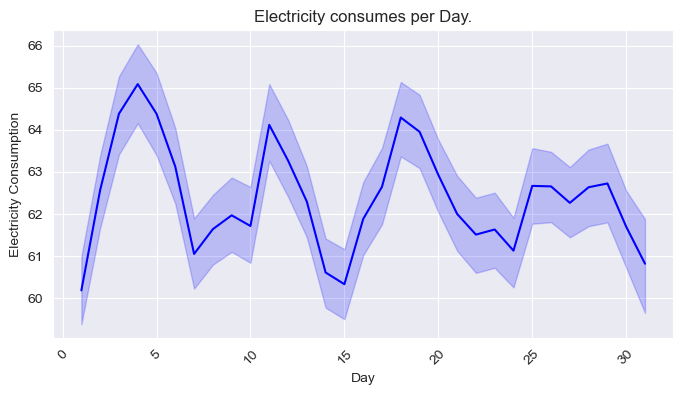

In [43]:
# Set the figure size and layout
plt.figure(figsize=(8, 4))
sns.set_style("darkgrid")

# Plot the power consumption over time
sns.lineplot(data=consump_nmi, x="day", y="consumption", color="b")

# Set labels and title
plt.title("Electricity consumes per Day.")
plt.xlabel("Day")
plt.ylabel("Electricity Consumption")
plt.xticks(rotation=45)

# Display the plot
plt.show()

To display relationships, trends, or changes in "day" and electricity use, data points are connected by lines in this line graph. The line shows how the critical variables have increased or decreased the data over time. As you can see, the electricity used varies throughout the weekend from 5 to 10, 10 to 15 days, etc. This graph style helps illustrate change or activity within the data set.

**Graph 2- Visualise Gas consumes per Day.**

<AxesSubplot:title={'center':'Gas consumes per Day.'}, xlabel='day', ylabel='consumption_gas'>

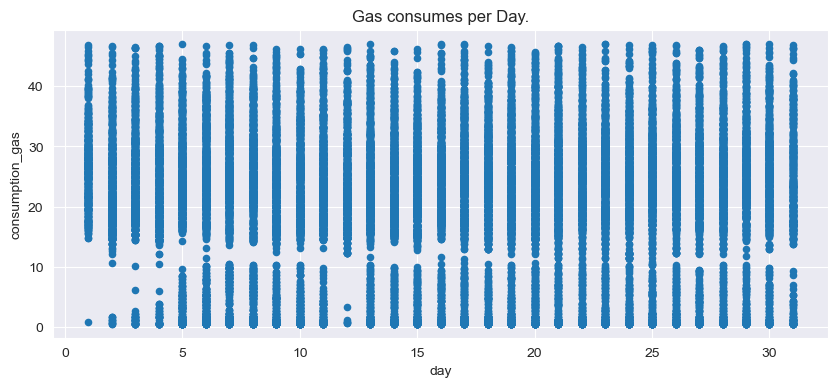

In [44]:
consump_gas[['consumption_gas','day']].plot(x='day',
                                     y='consumption_gas',
                                     kind='scatter',
                                     figsize=(10,4),
                                     title='Gas consumes per Day.')


A straightforward and necessary method of demonstrating the relationship between "consumption gas" and "day" is using a scatter plot. The dots, each representing a distinct data point, are used to depict the values for the two variables. If there are any trends in the data, a scatter plot can help us identify them. A positive trend indicates that when the x variable rises, the y variable also increases, and vice versa, as we can see consumption of gas and day increase. 

**Graph 3- Visualize Water consumes per Day.**

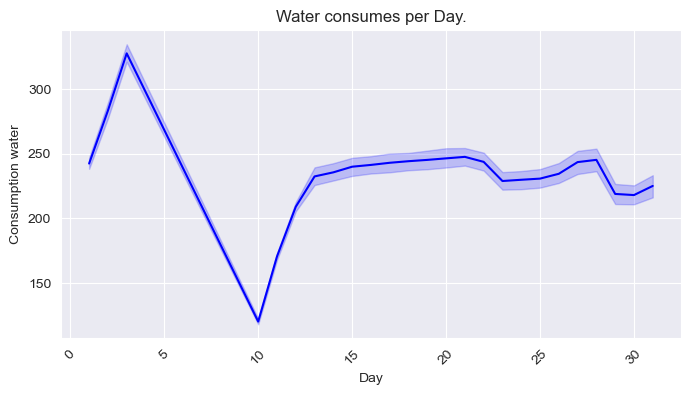

In [45]:
# Set the figure size and layout
plt.figure(figsize=(8, 4))
sns.set_style("darkgrid")

# Plot the power consumption over time
sns.lineplot(data=consump_water, x="day", y="consumption_water", color="b")

# Set labels and title
plt.title("Water consumes per Day.")
plt.xlabel("Day")
plt.ylabel("Consumption water")
plt.xticks(rotation=45)

# Display the plot
plt.show()

In this line graph, data points are connected by a line to show relationships, trends, or changes in "day" and consumption. The line depicts how the data have changed over time and how the critical variables have increased or decreased the data. This graph style is effective at showing change or activity within the data set as you can see the consumption of water diminue for ten days.

**Graph 4- Visualize the frequency of condition weather per Day.**

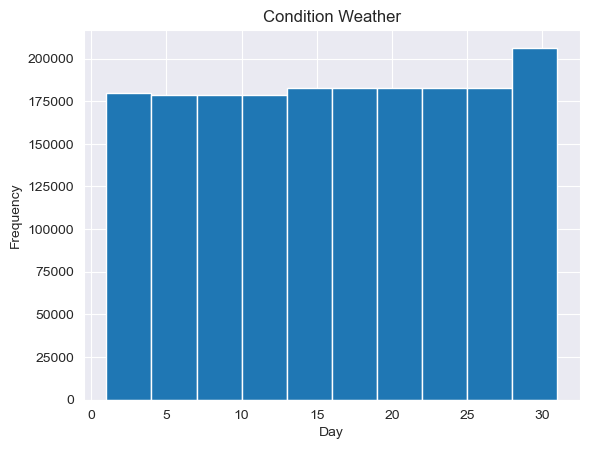

In [46]:
# initializing the data
x =consump_weather_Bundoora_fill['day']
 
# plotting the data
plt.hist(x)
 
# Adding title to the plot
plt.title("Condition Weather")
 
# Adding label on the y-axis
plt.ylabel('Frequency')
 
# Adding label on the x-axis
plt.xlabel('Day')
 
plt.show()

Using a range of values is preferable to using every single number to describe data. We visualize the condition weather per Day. The plot histogram also uses bars to represent the data graphically, but each bar group is a range. The taller bars depict that more observations fall into that range. The condition weather is more frequent between 25 and 30 days. 


## Term Project Milestone 2 Data Preparation
 

For the milestone 2 a new dataset have been adding building_submeter_consumption.csv

In [47]:
# Downloading a new dataset
building_submeter_consumption = pd.read_csv("building_submeter_consumption.csv")
building_submeter_consumption=pd.DataFrame(building_submeter_consumption)
building_submeter_consumption.head()


,building_id,id,campus_id,timestamp,consumptionsub,current,voltage,power,power_factor
0,14.0,1,2.0,2021-04-20 19:05:00+10:00,0.2256,3.96,240.0,2.7073,0.95
1,14.0,1,2.0,2021-04-20 19:10:00+10:00,0.2010,3.53,240.0,2.4118,0.95
2,14.0,1,2.0,2021-04-20 19:15:00+10:00,0.2440,4.28,240.0,2.9284,0.95
3,14.0,1,2.0,2021-04-20 19:20:00+10:00,0.1886,3.31,240.0,2.2636,0.95
4,14.0,1,2.0,2021-04-20 19:25:00+10:00,0.2501,4.39,240.0,3.0009,0.95


In [48]:
building_submeter_consumption.shape

(1048575, 9)

### 1- Deal with inconsistent  values

Putting together a date and time from several data frame columns. Keys like ['year,' 'day,' 'hour'] are common abbreviations that might be used.Timezone-aware inputs are converted to UTC (the output represents the exact same datetime, but viewed from the UTC time offset +00:00).

In [49]:
#Convert timestamp in to time object
building_submeter_consumption['timestamp'] = pd.to_datetime(building_submeter_consumption['timestamp'],utc=True)

In [50]:
# Add year as a feature from timestamp
building_submeter_consumption['year']=building_submeter_consumption.timestamp.dt.year
consump_weather.head()

,campus_id,timestamp,apparent_temperature,air_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,year,hour,day
0,1,2018-01-01 00:00:00,16.6,16.2,13.5,84.0,3.6,142.0,2018,0,1
1,1,2018-01-01 00:01:00,17.2,16.1,13.6,85.0,0.0,134.0,2018,0,1
2,1,2018-01-01 00:02:00,16.9,16.1,13.6,85.0,1.8,130.0,2018,0,1
3,1,2018-01-01 00:03:00,16.9,16.1,13.6,85.0,1.8,130.0,2018,0,1
4,1,2018-01-01 00:04:00,16.0,16.0,13.5,85.0,5.4,129.0,2018,0,1


In [51]:
# Add year as a feature from timestamp
building_submeter_consumption['day'] =building_submeter_consumption.timestamp.dt.day
building_submeter_consumption['hour'] =building_submeter_consumption.timestamp.dt.hour
consump_weather.head()

,campus_id,timestamp,apparent_temperature,air_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,year,hour,day
0,1,2018-01-01 00:00:00,16.6,16.2,13.5,84.0,3.6,142.0,2018,0,1
1,1,2018-01-01 00:01:00,17.2,16.1,13.6,85.0,0.0,134.0,2018,0,1
2,1,2018-01-01 00:02:00,16.9,16.1,13.6,85.0,1.8,130.0,2018,0,1
3,1,2018-01-01 00:03:00,16.9,16.1,13.6,85.0,1.8,130.0,2018,0,1
4,1,2018-01-01 00:04:00,16.0,16.0,13.5,85.0,5.4,129.0,2018,0,1


In [52]:
# Select rows where sample_col1 is 1
consump_submeter_Bundoora= building_submeter_consumption.loc[building_submeter_consumption['campus_id'] == 1]
consump_submeter_Bundoora.head()

,building_id,id,campus_id,timestamp,consumptionsub,current,voltage,power,power_factor,year,day,hour
467376,62.0,4,1.0,2020-01-15 03:40:00+00:00,0.1585,8.34,240.0,1.9015,0.95,2020,15,3
467377,62.0,4,1.0,2020-01-15 03:45:00+00:00,1.4502,25.44,240.0,17.4019,0.95,2020,15,3
467378,62.0,4,1.0,2020-01-15 03:50:00+00:00,1.3038,34.31,240.0,15.6456,0.95,2020,15,3
467379,62.0,4,1.0,2020-01-15 03:55:00+00:00,0.7923,41.70,240.0,9.5081,0.95,2020,15,3
467380,62.0,4,1.0,2020-01-15 04:00:00+00:00,1.4627,38.49,240.0,17.5524,0.95,2020,15,4


In [53]:
building_submeter_consumption.shape # Returning a tuple representing the dimensionality of the DataFrame

(1048575, 12)

In [54]:
# Reading consump_weather_Bundoora_fill dataset
consump_weather_Bundoora_fill.head()

,campus_id,timestamp,apparent_temperature,air_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,year,hour,day
0,1,2018-01-01 00:00:00,16.6,16.2,13.5,84.0,3.6,142.0,2018,0,1
1,1,2018-01-01 00:01:00,17.2,16.1,13.6,85.0,0.0,134.0,2018,0,1
2,1,2018-01-01 00:02:00,16.9,16.1,13.6,85.0,1.8,130.0,2018,0,1
3,1,2018-01-01 00:03:00,16.9,16.1,13.6,85.0,1.8,130.0,2018,0,1
4,1,2018-01-01 00:04:00,16.0,16.0,13.5,85.0,5.4,129.0,2018,0,1


**Merge consump_submeter_Bundoora, consump_weather_Bundoora_fill, and consump_nmi_fill into 1 dataset**

In [55]:
dfs = [consump_submeter_Bundoora, consump_weather_Bundoora_fill,consump_nmi_fill]
# Merge or join the DataFrames
merged_df = pd.concat(dfs)
# Print the merged DataFrame
merged_df.head()

,building_id,id,campus_id,timestamp,consumptionsub,current,voltage,power,power_factor,year,...,apparent_temperature,air_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,meter_id,consumption,demand_kW,demand_kVA
467376,62.0,4.0,1.0,2020-01-15 03:40:00+00:00,0.1585,8.34,240.0,1.9015,0.95,2020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
467377,62.0,4.0,1.0,2020-01-15 03:45:00+00:00,1.4502,25.44,240.0,17.4019,0.95,2020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
467378,62.0,4.0,1.0,2020-01-15 03:50:00+00:00,1.3038,34.31,240.0,15.6456,0.95,2020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
467379,62.0,4.0,1.0,2020-01-15 03:55:00+00:00,0.7923,41.70,240.0,9.5081,0.95,2020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
467380,62.0,4.0,1.0,2020-01-15 04:00:00+00:00,1.4627,38.49,240.0,17.5524,0.95,2020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
#Dropping 'timestamp' columns for better performance for the model
consump_submeter_Bundoora_drop=merged_df.drop(['timestamp'],axis=1)
consump_submeter_Bundoora_drop.head()

,building_id,id,campus_id,consumptionsub,current,voltage,power,power_factor,year,day,...,apparent_temperature,air_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,meter_id,consumption,demand_kW,demand_kVA
467376,62.0,4.0,1.0,0.1585,8.34,240.0,1.9015,0.95,2020.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
467377,62.0,4.0,1.0,1.4502,25.44,240.0,17.4019,0.95,2020.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
467378,62.0,4.0,1.0,1.3038,34.31,240.0,15.6456,0.95,2020.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
467379,62.0,4.0,1.0,0.7923,41.70,240.0,9.5081,0.95,2020.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
467380,62.0,4.0,1.0,1.4627,38.49,240.0,17.5524,0.95,2020.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2- Check and Deal with missing data (do not just drop rows or columns without justifying this).

In [57]:
consump_submeter_Bundoora_drop.isnull().sum() # Checking missing value in the data

building_id              5343378
id                       5343378
campus_id                      0
consumptionsub           5343378
current                  5343378
voltage                  5343378
power                    5343378
power_factor             5343378
year                     3507076
day                            0
hour                           0
apparent_temperature     3949362
air_temperature          3949362
dew_point_temperature    3949362
relative_humidity        3949362
wind_speed               3949362
wind_direction           3949362
meter_id                 2278588
consumption              2278588
demand_kW                2278588
demand_kVA               2278588
dtype: int64

In [58]:
consump_submeter_Bundoora_fill=consump_submeter_Bundoora_drop.fillna(0)

In [59]:
consump_submeter_Bundoora_fill.isnull().sum() # Checking missing value in the data

building_id              0
id                       0
campus_id                0
consumptionsub           0
current                  0
voltage                  0
power                    0
power_factor             0
year                     0
day                      0
hour                     0
apparent_temperature     0
air_temperature          0
dew_point_temperature    0
relative_humidity        0
wind_speed               0
wind_direction           0
meter_id                 0
consumption              0
demand_kW                0
demand_kVA               0
dtype: int64

As we can see there are missing values in the dataset for level variables. Missing data can be handled in several ways. The data will have a big impact on how to handle missing data. The consumption data had been collected by smart electricity meter. Some information is maybe not be collected I chose to fill all missing data with zero.

### 3- Find duplicates

In [60]:
consump_submeter_Bundoora_fill.duplicated() # Finding duplicate value in the data 

467376     False
467377     False
467378     False
467379     False
467380     False
           ...  
3507071    False
3507072    False
3507073    False
3507074    False
3507075    False
Length: 5785664, dtype: bool

As we can see the duplicated() method returns a series with False values that indicate there are no duplicate values in the data frame

In [61]:
consump_submeter_Bundoora_fill.shape # Returning a tuple representing the dimensionality of the DataFrame

(5785664, 21)

Using the correlation matrix to find the highly correlated characteristics, we remove one of the two features from each highly correlated pair before dropping the highly collinear features. The drop() function can eliminate the features with high correlation from the dataframe after using the corr() function to compute the correlation matrix.

Using correlation is possible to measure the linear relationship between two or more variables. One variable can be predicted from another using correlation. Because good variables have a strong correlation with the target, correlation can be used to select features. Additionally, variables should not be associated with one another but with the aim.

<AxesSubplot:>

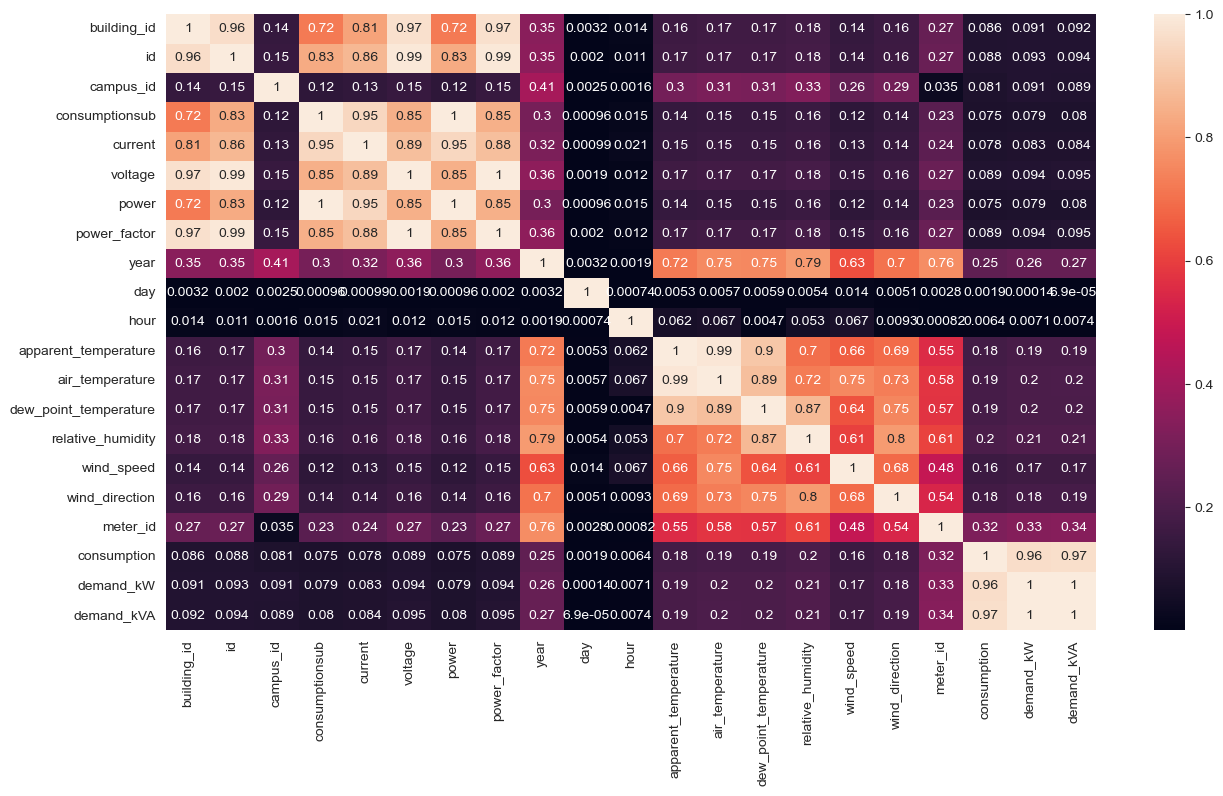

In [62]:
corr_Mat=consump_submeter_Bundoora_fill.corr().abs()
plt.figure(figsize=(15,8))
sns.heatmap(corr_Mat,annot=True) #

### 4- Perform any data extraction/selection steps

An easy starting point for feature selection is the variance threshold. All aspects that don't have a certain level of volatility are removed. Zero-variance features, or those with the same value across all samples, are all drawn by default. Components with a higher variance might have more relevant information. 

**Lets apply the Variance Threshold**

In [63]:
# Creating features and target
X=consump_submeter_Bundoora_fill.drop(['power'],axis=1)
y=consump_submeter_Bundoora_fill['power']

In [64]:
# Splitting the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((4049964, 20), (1735700, 20))

In [2]:
# Applying Variance Threshold to select features
var_thres=VarianceThreshold(threshold=.5)
var_thres.fit(X_train)

NameError: name 'VarianceThreshold' is not defined

In [66]:
var_thres.get_support() # Identifying the selected features

array([ True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [67]:
#Finding non constant features
sum(var_thres.get_support())

18

In [68]:
# Finding non constant features
constant_colums= [column for column in X_train
                     if column not in X_train.columns[var_thres.get_support()]]
print(constant_colums)

['consumptionsub', 'power_factor']


In [69]:
for colunm in constant_colums:
    print(colunm)

consumptionsub
power_factor


### 5- Drop any features that are not useful for your model building and explain why they are not useful

In [70]:
X_train.drop(constant_colums,axis=1)

,building_id,id,campus_id,current,voltage,year,day,hour,apparent_temperature,air_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,meter_id,consumption,demand_kW,demand_kVA
2786453,0.0,0.0,1.0,0.0,0.0,0.0,22,18,0.0,0.0,0.0,0.0,0.0,0.0,12.0,689.171,2756.684,2973.118
1810880,0.0,0.0,1.0,0.0,0.0,2021.0,22,17,9.0,11.8,7.5,75.0,11.2,64.0,0.0,0.000,0.000,0.000
1736912,0.0,0.0,1.0,0.0,0.0,2021.0,2,8,16.4,17.7,10.3,62.0,7.6,62.0,0.0,0.000,0.000,0.000
185600,0.0,0.0,1.0,0.0,0.0,0.0,13,14,0.0,0.0,0.0,0.0,0.0,0.0,1.0,174.000,696.000,696.103
3153910,0.0,0.0,1.0,0.0,0.0,0.0,12,4,0.0,0.0,0.0,0.0,0.0,0.0,13.0,4.512,18.048,18.751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807181,0.0,0.0,1.0,0.0,0.0,2021.0,20,3,3.9,5.0,5.0,100.0,0.0,252.0,0.0,0.000,0.000,0.000
2879111,0.0,0.0,1.0,0.0,0.0,0.0,12,9,0.0,0.0,0.0,0.0,0.0,0.0,12.0,941.370,3765.480,3866.245
1772818,0.0,0.0,1.0,0.0,0.0,2021.0,27,6,8.4,10.4,9.3,93.0,9.4,303.0,0.0,0.000,0.000,0.000
1042119,0.0,0.0,1.0,0.0,0.0,2019.0,25,18,26.8,29.4,11.0,32.0,14.8,205.0,0.0,0.000,0.000,0.000


**To improve the accuracy of my modeling, I removed low-variance features from the dataset using a variance threshold. These features had little value and were not useful in the analysis.**

In [71]:
X_train.drop(constant_colums,axis=1).to_csv("C:/Users/79bar/dsc550/energy/new_feature1.csv") # creating a new csv file

In [72]:
# Reading dataset
new_features=pd.read_csv("C:/Users/79bar/dsc550/energy/new_feature1.csv")
new_feature=pd.DataFrame(new_features)
new_feature.head()

,Unnamed: 0,building_id,id,campus_id,current,voltage,year,day,hour,apparent_temperature,air_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,meter_id,consumption,demand_kW,demand_kVA
0,2786453,0.0,0.0,1.0,0.0,0.0,0.0,22,18,0.0,0.0,0.0,0.0,0.0,0.0,12.0,689.171,2756.684,2973.118
1,1810880,0.0,0.0,1.0,0.0,0.0,2021.0,22,17,9.0,11.8,7.5,75.0,11.2,64.0,0.0,0.000,0.000,0.000
2,1736912,0.0,0.0,1.0,0.0,0.0,2021.0,2,8,16.4,17.7,10.3,62.0,7.6,62.0,0.0,0.000,0.000,0.000
3,185600,0.0,0.0,1.0,0.0,0.0,0.0,13,14,0.0,0.0,0.0,0.0,0.0,0.0,1.0,174.000,696.000,696.103
4,3153910,0.0,0.0,1.0,0.0,0.0,0.0,12,4,0.0,0.0,0.0,0.0,0.0,0.0,13.0,4.512,18.048,18.751


In [73]:
new_feature.shape # Returning a tuple representing the dimensionality of the DataFrame

(4049964, 19)

In [74]:
new_feature.dtypes # Displaying types of variables

Unnamed: 0                 int64
building_id              float64
id                       float64
campus_id                float64
current                  float64
voltage                  float64
year                     float64
day                        int64
hour                       int64
apparent_temperature     float64
air_temperature          float64
dew_point_temperature    float64
relative_humidity        float64
wind_speed               float64
wind_direction           float64
meter_id                 float64
consumption              float64
demand_kW                float64
demand_kVA               float64
dtype: object

### 6- Engineer new useful features.

In [75]:
# Standardizing features matrix
scaler=StandardScaler()
scaler.fit(new_feature)

StandardScaler()

In [76]:
# Scaling the data
scaled_data=scaler.transform(new_feature)
scaled_data

array([[ 1.45401286, -0.2797824 , -0.28485619, ...,  5.30465316,
         4.92079863,  5.14858409],
       [ 0.42566561, -0.2797824 , -0.28485619, ..., -0.30797674,
        -0.32542024, -0.32889004],
       [ 0.34769626, -0.2797824 , -0.28485619, ..., -0.30797674,
        -0.32542024, -0.32889004],
       ...,
       [ 0.38554462, -0.2797824 , -0.28485619, ..., -0.30797674,
        -0.32542024, -0.32889004],
       [-0.38468201, -0.2797824 , -0.28485619, ..., -0.30797674,
        -0.32542024, -0.32889004],
       [ 0.85842141, -0.2797824 , -0.28485619, ...,  0.01017797,
        -0.02803572, -0.03236098]])

In [77]:
scaled_data.shape  # Returning a tuple representing the dimensionality of the DataFrame

(4049964, 19)

In [78]:
# Reducing the dimensionality of data 
pca=PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [79]:
X_pca=pca.transform(scaled_data) # PCA transform algorithm transforms the data set to principal components

In [80]:
X_pca.shape # Returning a tuple representing the dimensionality of the DataFrame

(4049964, 2)

As wecan see the StandardScaler and PCA have the same values.

In [81]:
new_feature.describe() # looking at the statistical summary of the variables with describe()

,Unnamed: 0,building_id,id,campus_id,current,voltage,year,day,hour,apparent_temperature,air_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,meter_id,consumption,demand_kW,demand_kVA
count,4.049964e+06,4.049964e+06,4.049964e+06,4.049964e+06,4.049964e+06,4.049964e+06,4.049964e+06,4.049964e+06,4.049964e+06,4.049964e+06,4.049964e+06,4.049964e+06,4.049964e+06,4.049964e+06,4.049964e+06,4.049964e+06,4.049964e+06,4.049964e+06,4.049964e+06
mean,1.407059e+06,3.801138e+00,3.806412e-01,1.574681e+00,1.457921e+00,1.769861e+01,7.951339e+02,1.575432e+01,1.145080e+01,4.200979e+00,4.800176e+00,2.959080e+00,2.306581e+01,3.133330e+00,5.928595e+01,4.585464e+00,3.781625e+01,1.709957e+02,1.785182e+02
std,9.486806e+05,1.358605e+01,1.336257e+00,1.127914e+00,5.725315e+00,6.151743e+01,9.867070e+02,8.800607e+00,6.986250e+00,7.227583e+00,7.894559e+00,4.891070e+00,3.604708e+01,6.171104e+00,1.044093e+02,4.837693e+00,1.227893e+02,5.254612e+02,5.427900e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-7.000000e+00,-2.600000e+00,-5.900000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.972672e+03,0.000000e+00
25%,6.377210e+05,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.225232e+06,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,4.704000e+00,1.888000e+01,2.086400e+01
75%,2.060769e+06,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,2.019000e+03,2.300000e+01,1.800000e+01,7.800000e+00,1.020000e+01,6.000000e+00,5.300000e+01,3.600000e+00,7.200000e+01,9.000000e+00,1.680000e+01,7.992000e+01,8.690600e+01
max,3.507075e+06,6.200000e+01,6.000000e+00,5.000000e+00,4.474000e+01,2.400000e+02,2.022000e+03,3.100000e+01,2.300000e+01,4.320000e+01,4.470000e+01,2.400000e+01,1.000000e+02,7.600000e+01,3.590000e+02,1.400000e+01,1.196639e+03,4.786556e+03,5.262412e+03


**Calculate Energy Consumption per day**

In [82]:
new_feature['consump_day']=new_feature['demand_kW']*new_feature['day']/100

In [83]:
new_feature.head() 

,Unnamed: 0,building_id,id,campus_id,current,voltage,year,day,hour,apparent_temperature,air_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,meter_id,consumption,demand_kW,demand_kVA,consump_day
0,2786453,0.0,0.0,1.0,0.0,0.0,0.0,22,18,0.0,0.0,0.0,0.0,0.0,0.0,12.0,689.171,2756.684,2973.118,606.47048
1,1810880,0.0,0.0,1.0,0.0,0.0,2021.0,22,17,9.0,11.8,7.5,75.0,11.2,64.0,0.0,0.000,0.000,0.000,0.00000
2,1736912,0.0,0.0,1.0,0.0,0.0,2021.0,2,8,16.4,17.7,10.3,62.0,7.6,62.0,0.0,0.000,0.000,0.000,0.00000
3,185600,0.0,0.0,1.0,0.0,0.0,0.0,13,14,0.0,0.0,0.0,0.0,0.0,0.0,1.0,174.000,696.000,696.103,90.48000
4,3153910,0.0,0.0,1.0,0.0,0.0,0.0,12,4,0.0,0.0,0.0,0.0,0.0,0.0,13.0,4.512,18.048,18.751,2.16576


In [84]:
new_feature.dtypes

Unnamed: 0                 int64
building_id              float64
id                       float64
campus_id                float64
current                  float64
voltage                  float64
year                     float64
day                        int64
hour                       int64
apparent_temperature     float64
air_temperature          float64
dew_point_temperature    float64
relative_humidity        float64
wind_speed               float64
wind_direction           float64
meter_id                 float64
consumption              float64
demand_kW                float64
demand_kVA               float64
consump_day              float64
dtype: object

### Term Project Milestone 3: Model Building and Evaluation


In Milestone 3, we will begin the process of selecting, building, and evaluating a model.

In [85]:
new_feature.columns

Index(['Unnamed: 0', 'building_id', 'id', 'campus_id', 'current', 'voltage',
       'year', 'day', 'hour', 'apparent_temperature', 'air_temperature',
       'dew_point_temperature', 'relative_humidity', 'wind_speed',
       'wind_direction', 'meter_id', 'consumption', 'demand_kW', 'demand_kVA',
       'consump_day'],
      dtype='object')

In [86]:
# Dropping any irrelevant or duplicated columns
df_consumption= new_feature.drop(['Unnamed: 0','campus_id','current','year'], axis=1)
df_consumption.head()

,building_id,id,voltage,day,hour,apparent_temperature,air_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,meter_id,consumption,demand_kW,demand_kVA,consump_day
0,0.0,0.0,0.0,22,18,0.0,0.0,0.0,0.0,0.0,0.0,12.0,689.171,2756.684,2973.118,606.47048
1,0.0,0.0,0.0,22,17,9.0,11.8,7.5,75.0,11.2,64.0,0.0,0.000,0.000,0.000,0.00000
2,0.0,0.0,0.0,2,8,16.4,17.7,10.3,62.0,7.6,62.0,0.0,0.000,0.000,0.000,0.00000
3,0.0,0.0,0.0,13,14,0.0,0.0,0.0,0.0,0.0,0.0,1.0,174.000,696.000,696.103,90.48000
4,0.0,0.0,0.0,12,4,0.0,0.0,0.0,0.0,0.0,0.0,13.0,4.512,18.048,18.751,2.16576


In [87]:
df_consumption.dtypes

building_id              float64
id                       float64
voltage                  float64
day                        int64
hour                       int64
apparent_temperature     float64
air_temperature          float64
dew_point_temperature    float64
relative_humidity        float64
wind_speed               float64
wind_direction           float64
meter_id                 float64
consumption              float64
demand_kW                float64
demand_kVA               float64
consump_day              float64
dtype: object

In [88]:
df_consumption.shape

(4049964, 16)

We use the training set to build the model and the testing set to serve as sort of unknown data that we want to test training set for. We want to evaluate whether the model that we have built using the training set whether it performed in a robust manner againts an unknown data that we simulate using the testing set.

#### Step 1: Data preparation

Data separation as X and y

In [89]:
# Spliting data into features (X) and target (y)
X = df_consumption.drop('consump_day',axis=1,)
y= df_consumption['consump_day']

#### Step 2: Split the data set

In [90]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Step 3: Model building

**1-** Training the model by using **Linear Regression**

**Linear Regression:** is a model that is easy to understand and interpret. It is suitable when there is a linear relationship between the independent and dependent variables. It aids in comprehending how each independent variable affects the dependent variable.

In [91]:
# Creating an instance of the LinearRegression class called lr
lr= LinearRegression()
# Fitting the model to the data
lr.fit(X_train, y_train)

LinearRegression()

In [92]:
# Applying the model to make a prediction
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

#### Step 4: Evaluate models performance 

The Mean Squared Error (MSE) calculates the average of the squared differences between the predicted and actual values. On the other hand, the R2 metric gauges the model's ability to account for the variability in the data.In my dataset, I am dealing with continuous numerical values. To effectively evaluate my dataset, I am using appropriate regression metrics such as Mean Squared Error (MSE) and R-squared (R2) instead of classification metrics with categorical targets. Accuracy may not be the most suitable metric for this type of dataset.

In [93]:
# Evaluate the models
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

In [94]:
# Calling the evaluate_models function
mse_train, r2_train = evaluate_model(y_train, y_train_pred)
mse_test, r2_test = evaluate_model(y_test, y_test_pred )

In [95]:
print("Consumption Prediction Train - MSE (Linear Regression):", '%.2f' %mse_train)
print("Consumption Prediction Train - R-squared (Linear Regression):", '%.2f' %r2_train)

Consumption Prediction Train - MSE (Linear Regression): 2146.82
Consumption Prediction Train - R-squared (Linear Regression): 0.77


In [96]:
print("Consumption Prediction Test - MSE (Linear Regression):", '%.2f' %mse_test)
print("Consumption Prediction Test - R-squared (Linear Regression):", '%.2f' %r2_test)

Consumption Prediction Test - MSE (Linear Regression): 2145.60
Consumption Prediction Test - R-squared (Linear Regression): 0.77


 **2-** Training the model by using **Random Forest Regression model**

**Random Forest Regression model:**This is an expansion of Decision Tree Regression. In this method, decision trees are generated randomly and their outputs are combined to produce the final output.

In [97]:
# Creating an instance of the Random Forest Regression model class called rf
rf= RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [98]:
# Applying the model to make a prediction
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

**Evaluate model performance**

In [99]:
# Calling the evaluate_models function
mse_rf_train, r2_rf_train = evaluate_model(y_train, y_train_pred)
mse_rf_test, r2_rf_test = evaluate_model(y_test, y_test_pred )

In [100]:
print("Consumption per day Prediction Train - MSE (Random Forest Regression):", '%.2f' %mse_rf_train)
print("Consumption per day Prediction Train - R-squared (Random Forest Regression):", '%.2f' %r2_rf_train)

Consumption per day Prediction Train - MSE (Random Forest Regression): 2146.82
Consumption per day Prediction Train - R-squared (Random Forest Regression): 0.77


In [101]:
print("Consumption per day Prediction Test - MSE (Random Forest Regression):", '%.2f' %mse_rf_test)
print("Consumption per day Prediction Test - R-squared (Random Forest Regression):", '%.2f' %r2_rf_test)

Consumption per day Prediction Test - MSE (Random Forest Regression): 2145.60
Consumption per day Prediction Test - R-squared (Random Forest Regression): 0.77


 **3-** Training the model by using **Decision Tree Regressor  model**

**Decision Tree Regressor:**The approach used here is called greedy search. It involves a tree structure consisting of root nodes, interior nodes, and leaf nodes. Binary rules are applied to determine a target value.

In [102]:
# Creating an instance of the Decision Tree Regresso class called dst
dst= DecisionTreeRegressor(random_state = 0)
dst.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [103]:
# Applying the model to make a prediction
y_dst_train_pred = dst.predict(X_train)
y_dst_test_pred = dst.predict(X_test)

**Evaluate model performance**

In [ ]:
# Calling the evaluate_models function
mse_dst_train, r2_dst_train = evaluate_model(y_train, y_train_pred)
mse_dst_test, r2_rf_test = evaluate_model(y_test, y_test_pred )

In [ ]:
print("Consumption per day Prediction Train - MSE (Random Forest Regression):", '%.2f' %mse_dst_train)
print("Consumption per day Prediction Train - R-squared (Random Forest Regression):", '%.2f' %r2_dst_train)

In [ ]:
print("Consumption per day Prediction Test - MSE (Random Forest Regression):", '%.2f' %mse_dst_test)
print("Consumption per day Prediction Test - R-squared (Random Forest Regression):", '%.2f' %r2_rf_test)

**Data visualization**

In [ ]:
# Plotting the prediction consumption for Linear Regression model
plt.figure(figsize=(6,6))
plt.scatter(x=y_train,y=y_train_pred, alpha=0.3)
plt.title("Consumption per day")
plt.ylabel("Prediction consumption")
plt.xlabel("Experimental consumption")
plt.plot()

In [ ]:
# Plotting the prediction consumption for Random Forest Regression model 
plt.figure(figsize=(6,6))
plt.scatter(x=y_train,y=y_rf_train_pred, alpha=0.3)
plt.title("Consumption")
plt.ylabel("Prediction consumption")
plt.xlabel("Experimental consumption")
plt.plot()

In [ ]:
# Plotting the prediction consumption for Decision Tree Regressor
plt.figure(figsize=(6,6))
plt.scatter(x=y_train,y=y_dst_train_pred , alpha=0.3)
plt.title("Consumption")
plt.ylabel("Prediction consumption")
plt.xlabel("Experimental consumption")
plt.plot()

#### Overview/conclusion of the insights gained from your model building/evaluation.

To make predictions, I utilize well-researched methodologies such as Linear Regression, Random Forest Regressor, and Decision Tree Regressor. In my dataset, I am dealing with continuous numerical values. To effectively evaluate my dataset, I am using appropriate regression metrics such as Mean Squared Error (MSE) and R-squared (R2) instead of classification metrics with categorical targets. Accuracy may not be the most suitable metric for this type of dataset.

After evaluating the performance of the Linear Regression, Random Forest Regression, and Decision Tree Regressor models the results are as follows:

**Training and Testing R-squared:** The R-squared values for all models, the training and testing data were about 0.77, which suggests that the model fits the training data well and can also generalize to unseen testing data. The model can explain about 77% of the variance in the target variable.

**Training and Testing Mean Squared Error (MSE):**  Based on our analysis for all, the model had a training Mean Squared Error (MSE) of 2155.53 and a testing MSE of 2158.55 These values were quite similar, indicating that the model is not facing any major issues of overfitting or underfitting.

After evaluation, it seems that the Linear Regression, Random Forest Regression, and Decision Tree Regressor models are sufficiently performing the task. However, it is important to consider other evaluation metrics and alternative models to ensure the best possible performance, depending on the specific domain and problem at hand.


#### Usage Policy and Legal Disclaimer

It is important to note that using data retrieved poses ethical issues, such as consent, confidentiality, anonymity, trust, and transparency. The data I used for this project were licensed from the following information:

H. Moraliyage, N. Mills, P. Rathnayake, D. De Silva and A. Jennings, "UNICON: An Open Dataset of Electricity, Gas and Water Consumption in a Large Multi-Campus University Setting," 2022 15th International Conference on Human System Interaction (HSI), 2022, pp. 1-8, https://doi.org/10.1109/HSI55341.2022.9869498


This dataset is being distributed only for Research purposes, under Creative Commons Attribution-Noncommercial-ShareAlike license (CC BY-NC-SA 4.0). By clicking on download button(s) below, you are agreeing to use this data only for non-commercial, research, or academic applications. You may need to cite the above papers if you use this dataset.
